<a href="https://colab.research.google.com/github/AnovaYoung/IoT_PhysicalTherapy/blob/main/EDAforIoT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from zipfile import ZipFile
import os
import pandas as pd
import numpy as np



zip_file_path = '/Users/anovayoungers/Downloads/physical+therapy+exercises+dataset.zip'

extraction_directory = '/Users/anovayoungers/Downloads/physical_therapy_dataset'

with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

    print(f'Files Extracted to {extraction_directory}')

for root, dirs, files in os.walk(extraction_directory, topdown=True):
    for name in files:
        print(os.path.join(root, name))
    for name in  dirs:
        print(os.path.join(root, name))


def load_data(file_path):
    """Load data from a specified file path into a pandas DataFrame."""
    try :
        data = pd.read_csv(file_path, sep="\t", header=None)
        return data
    except Exception as e:
        print(f"Error Loading Data: {e} ")
        return None

file_path = '/Users/anovayoungers/Downloads/physical_therapy_dataset/s1/e1/u1/test.txt'
data = load_data(file_path)

def load_data_from_directory(directory_path):
    sensor_data = []
    session_metadata = []
    times_metadata = []

    for root, dirs, files in os.walk(directory_path, topdown=True):
        parts = root.split(os.sep)
        subject = next((part for part in parts if part.startswith('s')), None)
        exercise = next((part for part in parts if part.startswith('e')), None)
        sensor_unit = next((part for part in parts if part.startswith('u')), None)

        for name in files:
            file_path = os.path.join(root, name)
            if name == 'test.txt':
                data = pd.read_csv(file_path, sep=";", header=0)
                data['subject'] = subject
                data['exercise'] = exercise
                data['sensor_unit'] = sensor_unit
                sensor_data.append(data)
            elif name == 'template_session.txt':
                session_data = pd.read_csv(file_path, sep=";", header=0)
                session_data['subject'] = subject
                session_data['exercise'] = exercise
                session_data['sensor_unit'] = sensor_unit
                session_metadata.append(session_data)
            elif name == 'template_times.txt':
                times_data = pd.read_csv(file_path, sep=";", header=0)
                times_data['subject'] = subject
                times_data['exercise'] = exercise

                times_metadata.append(times_data)

    sensor_df = pd.concat(sensor_data, ignore_index=True)
    session_df = pd.concat(session_metadata, ignore_index=True)
    times_df = pd.concat(times_metadata, ignore_index=True)

    return sensor_df, session_df, times_df

extraction_directory = '/Users/anovayoungers/Downloads/physical_therapy_dataset'
sensor_df, session_df, times_df = load_data_from_directory(extraction_directory)



Files Extracted to /Users/anovayoungers/Downloads/physical_therapy_dataset
/Users/anovayoungers/Downloads/physical_therapy_dataset/.DS_Store
/Users/anovayoungers/Downloads/physical_therapy_dataset/Description.pdf
/Users/anovayoungers/Downloads/physical_therapy_dataset/s5
/Users/anovayoungers/Downloads/physical_therapy_dataset/s2
/Users/anovayoungers/Downloads/physical_therapy_dataset/s3
/Users/anovayoungers/Downloads/physical_therapy_dataset/s4
/Users/anovayoungers/Downloads/physical_therapy_dataset/s1
/Users/anovayoungers/Downloads/physical_therapy_dataset/s5/e5
/Users/anovayoungers/Downloads/physical_therapy_dataset/s5/e2
/Users/anovayoungers/Downloads/physical_therapy_dataset/s5/e3
/Users/anovayoungers/Downloads/physical_therapy_dataset/s5/e4
/Users/anovayoungers/Downloads/physical_therapy_dataset/s5/e1
/Users/anovayoungers/Downloads/physical_therapy_dataset/s5/e6
/Users/anovayoungers/Downloads/physical_therapy_dataset/s5/e8
/Users/anovayoungers/Downloads/physical_therapy_dataset/s5

In [ ]:
print(sensor_df.head())
print(session_df.head())
print(times_df.head())

   time index     acc_x     acc_y     acc_z     gyr_x     gyr_y     gyr_z  \
0           1  1.141452  9.587617  1.343498 -0.070101  0.005029 -0.011399   
1           2  1.164059  9.602035  1.463472 -0.034009  0.010527 -0.011461   
2           3  1.164136  9.639337  1.478518  0.002012 -0.015333 -0.011723   
3           4  1.194045  9.661973  1.374475  0.020135 -0.000033 -0.011679   
4           5  1.178997  9.647259  1.329349  0.025554  0.001804 -0.010769   

      mag_x     mag_y     mag_z subject exercise sensor_unit  
0 -0.445307 -0.798925 -0.107220      s5       e5          u1  
1 -0.446360 -0.797980 -0.108362      s5       e5          u1  
2 -0.445484 -0.798622 -0.111318      s5       e5          u1  
3 -0.444755 -0.797540 -0.110497      s5       e5          u1  
4 -0.444055 -0.797550 -0.108431      s5       e5          u1  
   time index     acc_x     acc_y     acc_z     gyr_x     gyr_y     gyr_z  \
0           1  0.652541  9.682474 -1.445645 -0.009881  0.000176 -0.007806   
1    

In [ ]:
# Check for missing values in the sensor data
missing_values_sensor = sensor_df.isnull().sum()
print("Missing values in sensor data:")
print(missing_values_sensor)

# Central tendency, dispersion, and shape of distribution
descriptive_statistics_sensor = sensor_df.describe()
print("\nDescriptive statistics for sensor data:")
print(descriptive_statistics_sensor)

# Check for missing values in the session metadata
missing_values_session = session_df.isnull().sum()
print("\nMissing values in session metadata:")
print(missing_values_session)

# Summarize the descriptive statistics for the session metadata
descriptive_statistics_session = session_df.describe()
print("\nDescriptive statistics for session metadata:")
print(descriptive_statistics_session)

# Checking for missing values in the times metadata
missing_values_times = times_df.isnull().sum()
print("\nMissing values in times metadata:")
print(missing_values_times)

# Summarizing the descriptive statistics for the times metadata
descriptive_statistics_times = times_df.describe()
print("\nDescriptive statistics for times metadata:")
print(descriptive_statistics_times)


Missing values in sensor data:
time index     0
acc_x          0
acc_y          0
acc_z          0
gyr_x          0
gyr_y          0
gyr_z          0
mag_x          0
mag_y          0
mag_z          0
subject        0
exercise       0
sensor_unit    0
dtype: int64

Descriptive statistics for sensor data:
         time index         acc_x         acc_y         acc_z         gyr_x  \
count  1.101390e+06  1.101390e+06  1.101390e+06  1.101390e+06  1.101390e+06   
mean   2.761640e+03  1.087901e-01  8.840507e-01  2.703277e-01  3.696610e-03   
std    1.602969e+03  5.577723e+00  6.066609e+00  5.335446e+00  1.942545e-01   
min    1.000000e+00 -3.165472e+01 -6.183438e+01 -4.013284e+01 -1.061741e+01   
25%    1.377000e+03 -2.546478e+00 -3.001768e+00 -2.681052e+00 -1.545100e-02   
50%    2.754000e+03  4.292045e-01  8.982650e-01  2.239375e-01  1.167000e-03   
75%    4.131000e+03  3.046597e+00  5.969961e+00  3.639990e+00  2.131400e-02   
max    6.067000e+03  2.424821e+01  8.485234e+01  6.314997e+01 

There are no missing values in any of the three datasets (sensor_data, session_metadata, times_metadata).

The sensor data has a wide range of values, represented by the min and max. The standard deviation is relatively high for accelerometer (acc_x, acc_y, acc_z) and gyroscope (gyr_x, gyr_y, gyr_z) readings, suggesting pretty significant variability in the sensor readings. This is not unusual in physical movement data.

Times Metadata: The execution type has a mean of 2 and standard deviation close to 0.82, which suggests that the execution types are fairly evenly distributed. The start and end columns show the time frames for the exercises, with a wide range as well.

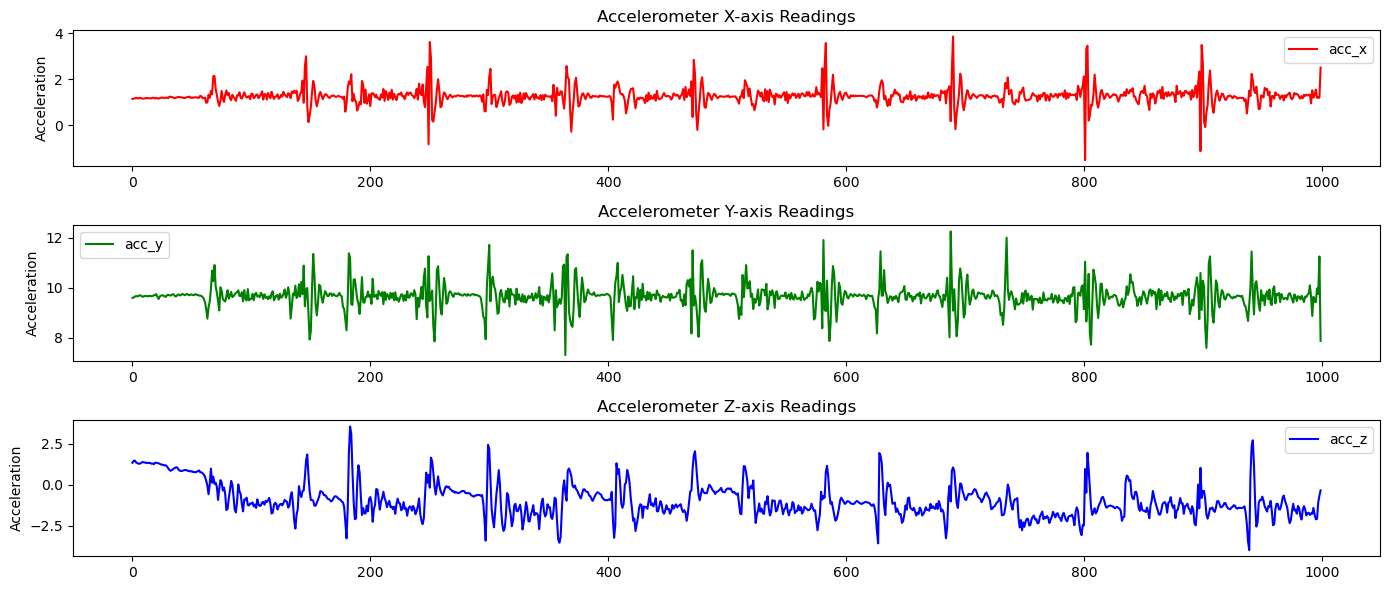

In [ ]:
import matplotlib.pyplot as plt

sample_size = 1000

# Plot accelerometer data
plt.figure(figsize=(14, 6))

# X-axis
plt.subplot(3, 1, 1)
plt.plot(sensor_df['acc_x'][:sample_size], label='acc_x', color='r')
plt.title('Accelerometer X-axis Readings')
plt.ylabel('Acceleration')
plt.legend()

# Y-axis
plt.subplot(3, 1, 2)
plt.plot(sensor_df['acc_y'][:sample_size], label='acc_y', color='g')
plt.title('Accelerometer Y-axis Readings')
plt.ylabel('Acceleration')
plt.legend()

# Z-axis
plt.subplot(3, 1, 3)
plt.plot(sensor_df['acc_z'][:sample_size], label='acc_z', color='b')
plt.title('Accelerometer Z-axis Readings')
plt.ylabel('Acceleration')
plt.legend()

plt.tight_layout()
plt.show()


While there are fluctuations, there does not seem to be a clear, repeating pattern that would make this a straightforward time series forecasting problem. A traditional Time-Series model may not be advised.

**Data Distribution**

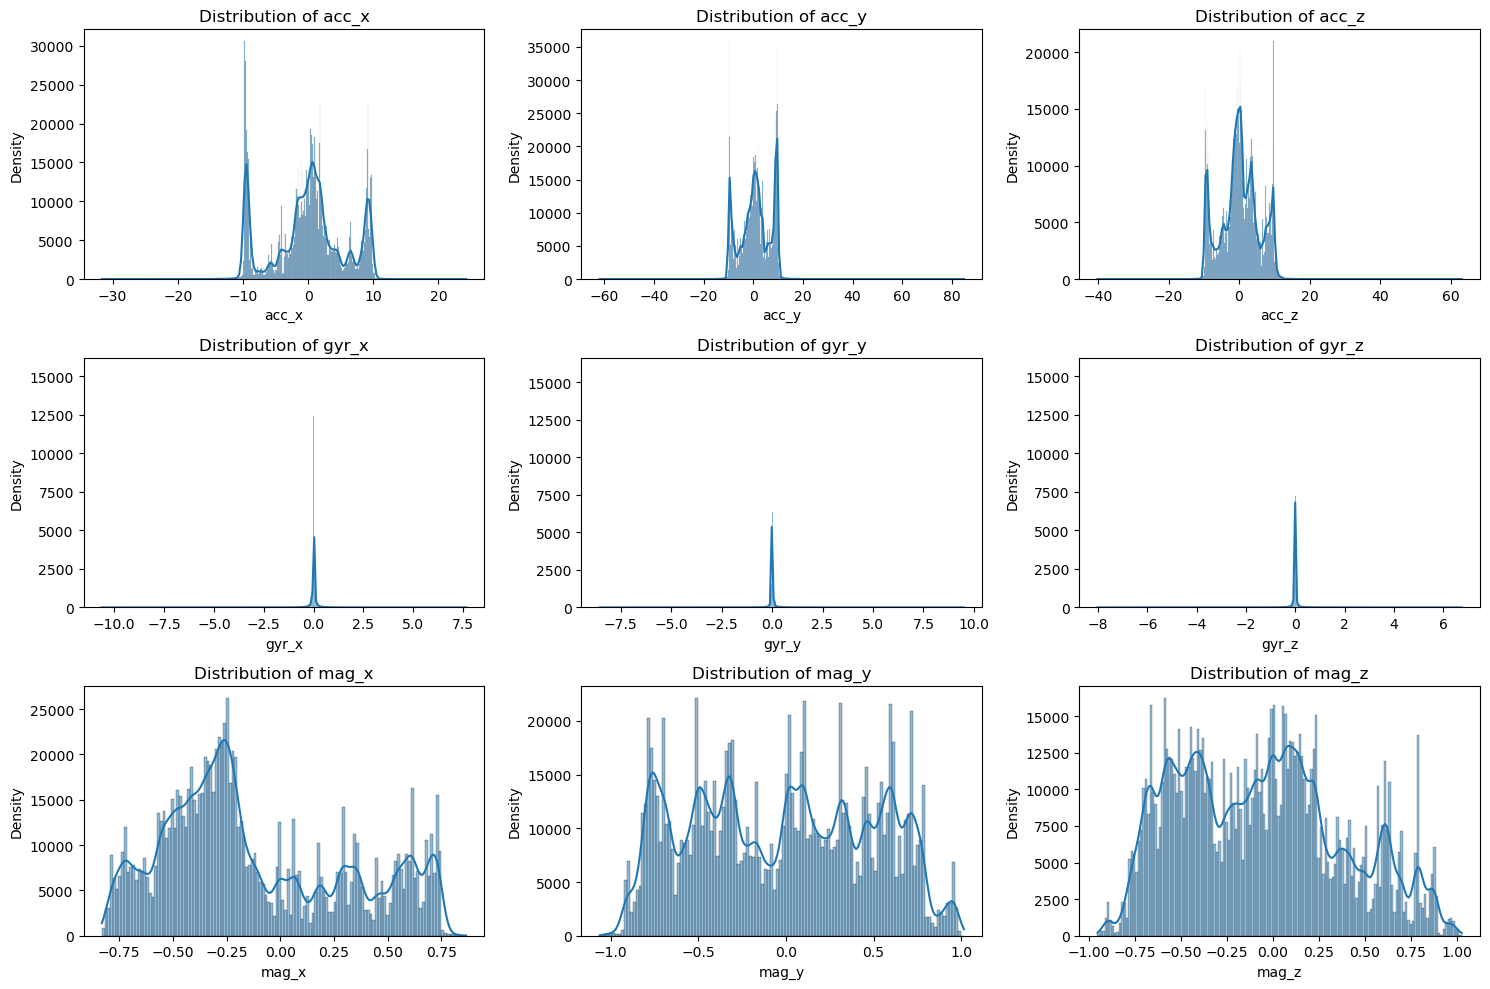

In [ ]:
import seaborn as sns

sensor_columns = ['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'mag_x', 'mag_y', 'mag_z']

# histograms/density plots for each sensor reading
plt.figure(figsize=(15, 10))

for i, column in enumerate(sensor_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(sensor_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


Accelerometer Readings (acc_x, acc_y, acc_z):

The x and z-axis readings are centered around zero, these axes may represent directions where gravity has less influence (possibly horizontal movements).
The y-axis readings are not centered around zero, which might suggest that this axis is aligned with gravity (vertical movements), and captures the static acceleration due to gravity plus any dynamic acceleration.

Gyroscope Readings (gyr_x, gyr_y, gyr_z):

The readings for all axes of the gyroscope are centered around zero with a narrow distribution, which is expected as these represent angular velocity, and most movements in physical therapy exercises may not involve very rapid rotations.

Magnetometer Readings (mag_x, mag_y, mag_z):

These readings show a wider distribution. The spread suggests varying orientations of the sensor units with respect to the magnetic north during the exercises.

From these distributions we can infer that the sensor data is likely multimodal, with several peaks in the histograms that could correspond to different positions or movements in the exercises. It's also evident that there are outliers in the accelerometer readings, as seen by the long tails in their distributions.

**Outliers**

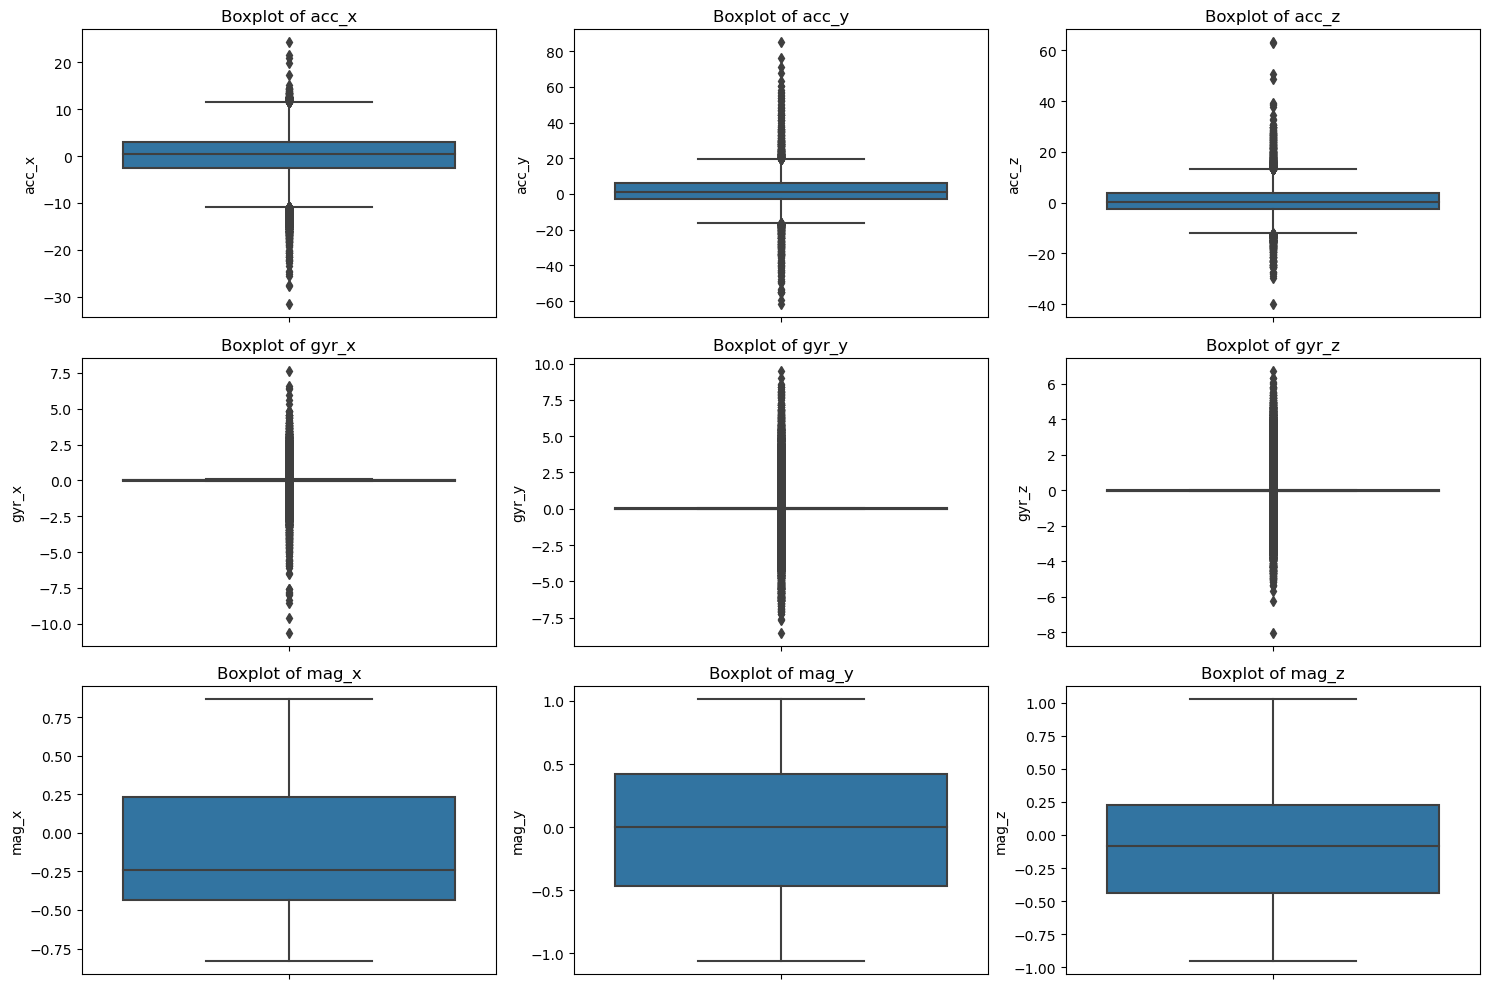

In [ ]:
sensor_columns = ['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'mag_x', 'mag_y', 'mag_z']

# Boxplots for sensor readings
plt.figure(figsize=(15, 10))

for i, column in enumerate(sensor_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=sensor_df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


Detect outliers using the IQR method

In [ ]:
def detect_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR))]
    return outliers

sensor_columns = ['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'mag_x', 'mag_y', 'mag_z']

outliers_dict = {}

for column in sensor_columns:
    outliers = detect_outliers_iqr(sensor_df, column)
    outliers_dict[column] = outliers
    print(f'Number of outliers in {column}: {len(outliers)}')

# Examine a few of the outliers for one sensor axis
print(outliers_dict['acc_x'].head())


Number of outliers in acc_x: 1798
Number of outliers in acc_y: 442
Number of outliers in acc_z: 836
Number of outliers in gyr_x: 207362
Number of outliers in gyr_y: 192371
Number of outliers in gyr_z: 219954
Number of outliers in mag_x: 0
Number of outliers in mag_y: 0
Number of outliers in mag_z: 0
       time index      acc_x      acc_y     acc_z     gyr_x     gyr_y  \
20461         250  12.333287 -17.067959  6.817935 -1.162850 -0.561963   
21013         802  12.523819 -18.778492  8.032073 -0.175403 -0.303939   
23298        3087  14.252419 -10.571313  5.173331 -1.400568 -0.105303   
25501         237 -11.282683  -1.721106  3.230628 -0.281133  0.181405   
37738        2014  14.431288   3.155698  5.740118  0.464014 -0.397147   

          gyr_z     mag_x     mag_y     mag_z subject exercise sensor_unit  
20461 -0.836473 -0.419926  0.784221 -0.486202      s5       e5          u2  
21013 -1.310473 -0.412393  0.748848 -0.524666      s5       e5          u2  
23298 -1.308988 -0.395439  0.

 There are a significant number of outliers in the gyroscope readings, which could suggest either highly dynamic movements during the exercises or some kind of sensor noise or error.

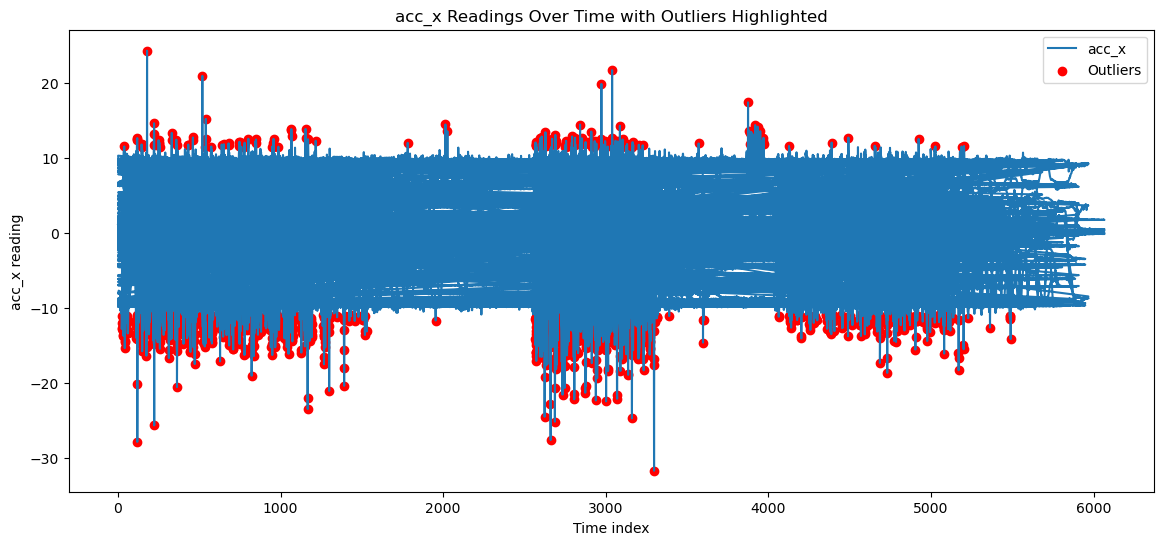

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(sensor_df['time index'], sensor_df['acc_x'], label='acc_x')
plt.scatter(outliers_dict['acc_x']['time index'], outliers_dict['acc_x']['acc_x'],
            color='red', label='Outliers')
plt.xlabel('Time index')
plt.ylabel('acc_x reading')
plt.title('acc_x Readings Over Time with Outliers Highlighted')
plt.legend()
plt.show()


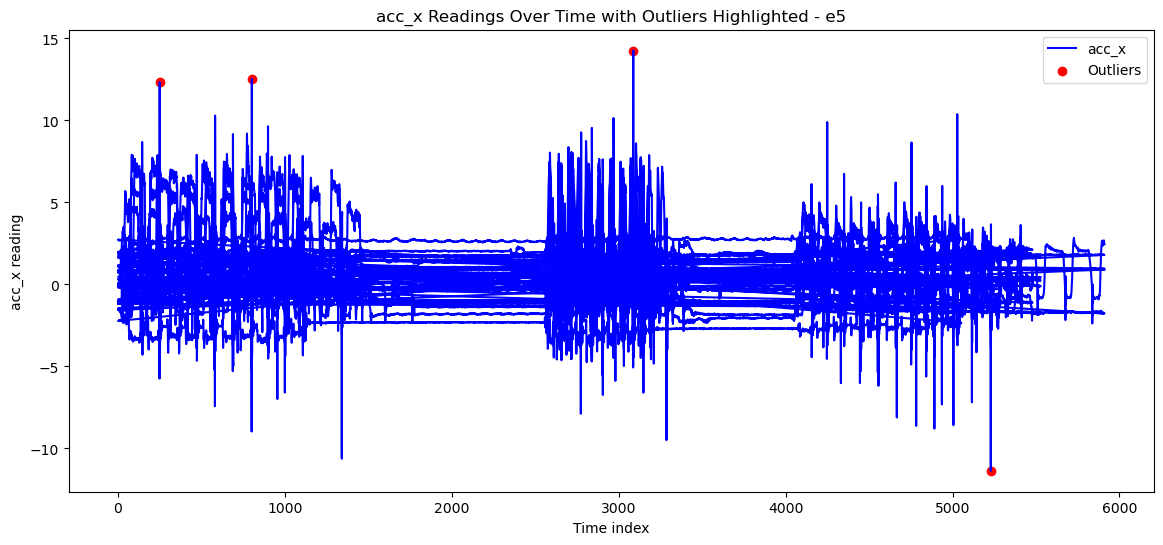

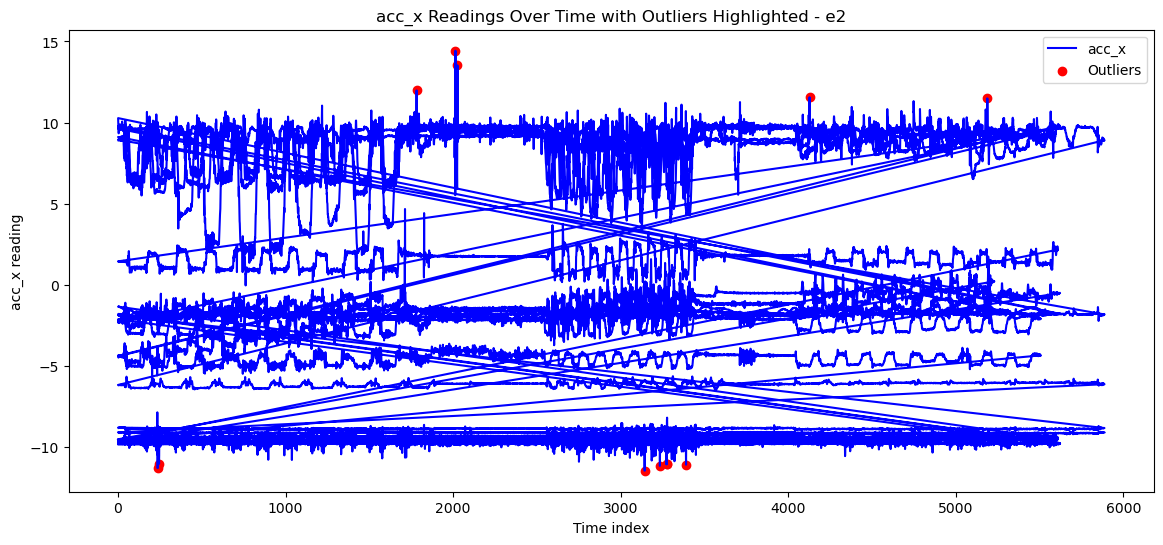

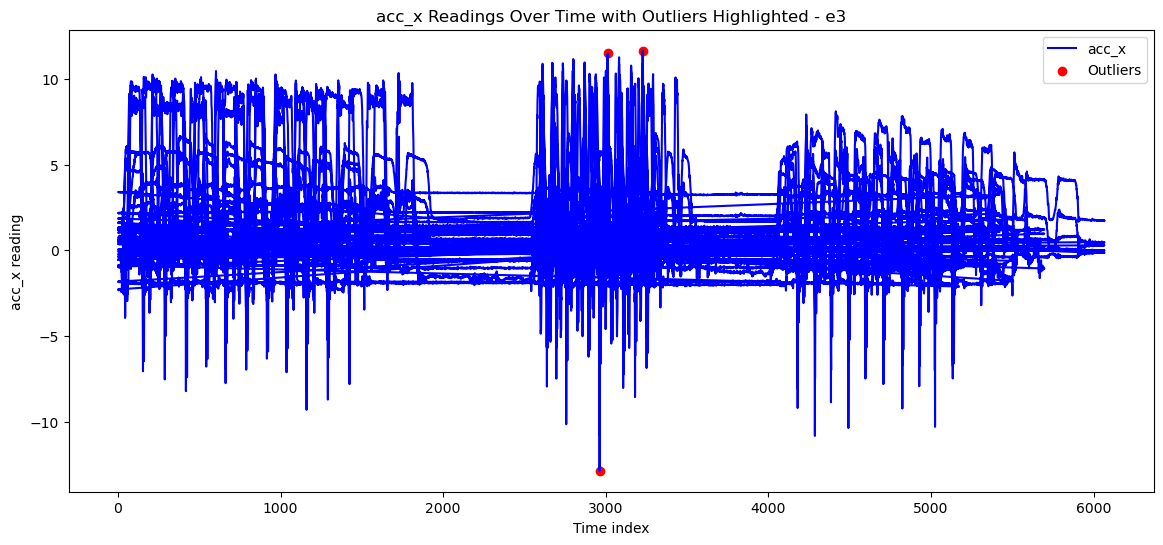

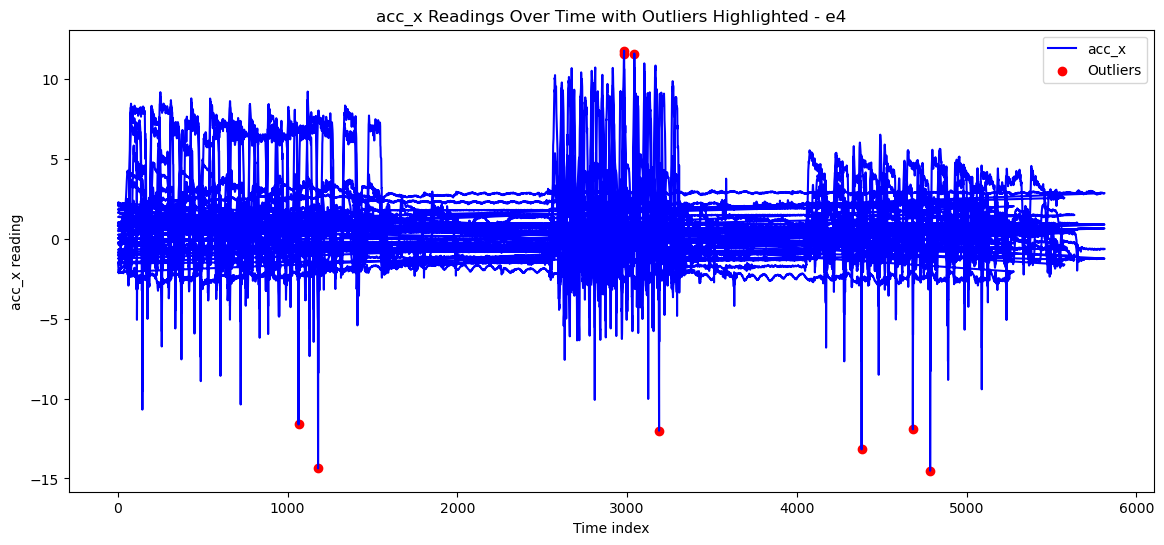

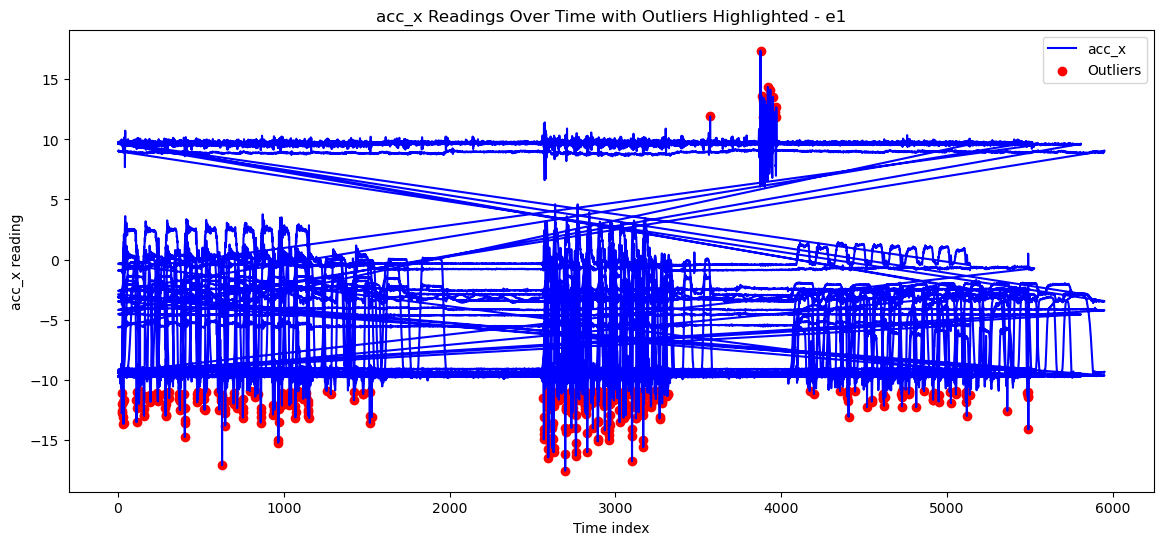

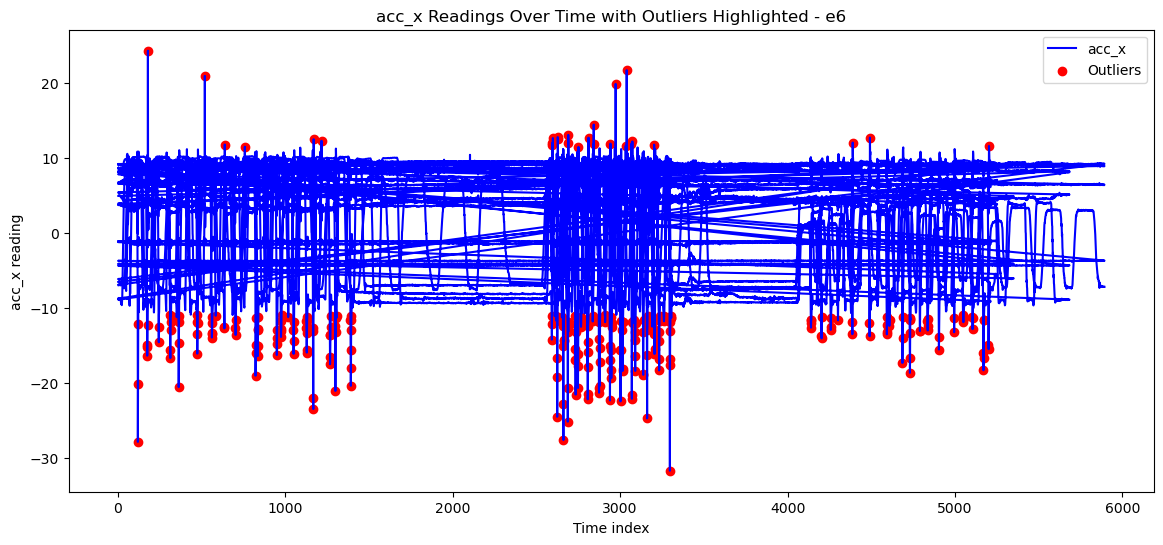

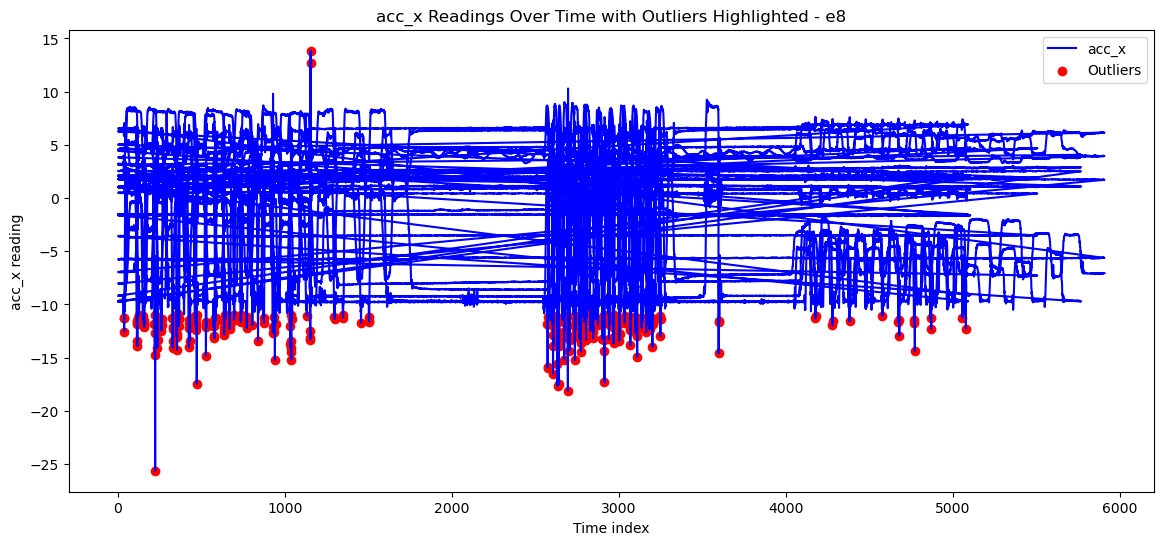

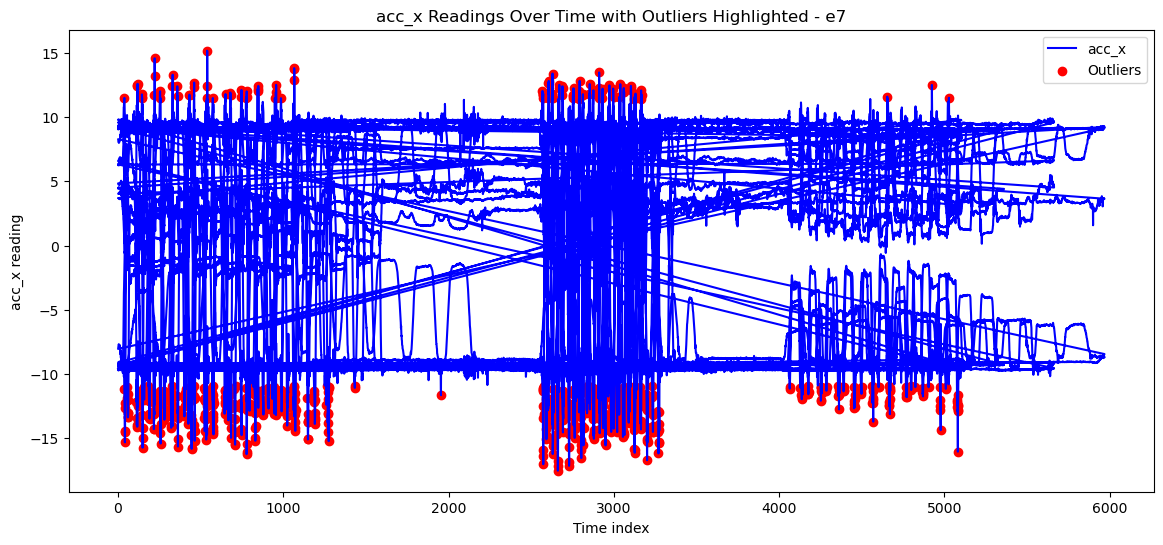

In [ ]:
exercises = sensor_df['exercise'].unique()

for exercise in exercises:

    exercise_df = sensor_df[sensor_df['exercise'] == exercise]
    outliers_exercise = outliers_dict['acc_x'][outliers_dict['acc_x']['exercise'] == exercise]

    plt.figure(figsize=(14, 6))
    plt.plot(exercise_df['time index'], exercise_df['acc_x'], label='acc_x', linestyle='-', marker='', color='blue')
    plt.scatter(outliers_exercise['time index'], outliers_exercise['acc_x'], color='red', label='Outliers')
    plt.title(f'acc_x Readings Over Time with Outliers Highlighted - {exercise}')
    plt.xlabel('Time index')
    plt.ylabel('acc_x reading')
    plt.legend()
    plt.show()

Each exercise seems to exhibit a distinct pattern of accelerometer readings, which might be indicative of the specific movements involved in that exercise. The variance in the readings, as well as the frequency and amplitude of the outliers, vary across exercises.

The presence of outliers appears to be consistent across all exercises, suggesting that these may be inherent to the type of physical activity being recorded rather than random noise. This could be due to sudden starts and stops or changes in movement direction.

/var/folders/3y/w5ts8qfs3sl47n2k1dprbgs00000gn/T/ipykernel_31613/1657483335.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sensor_df.corr()


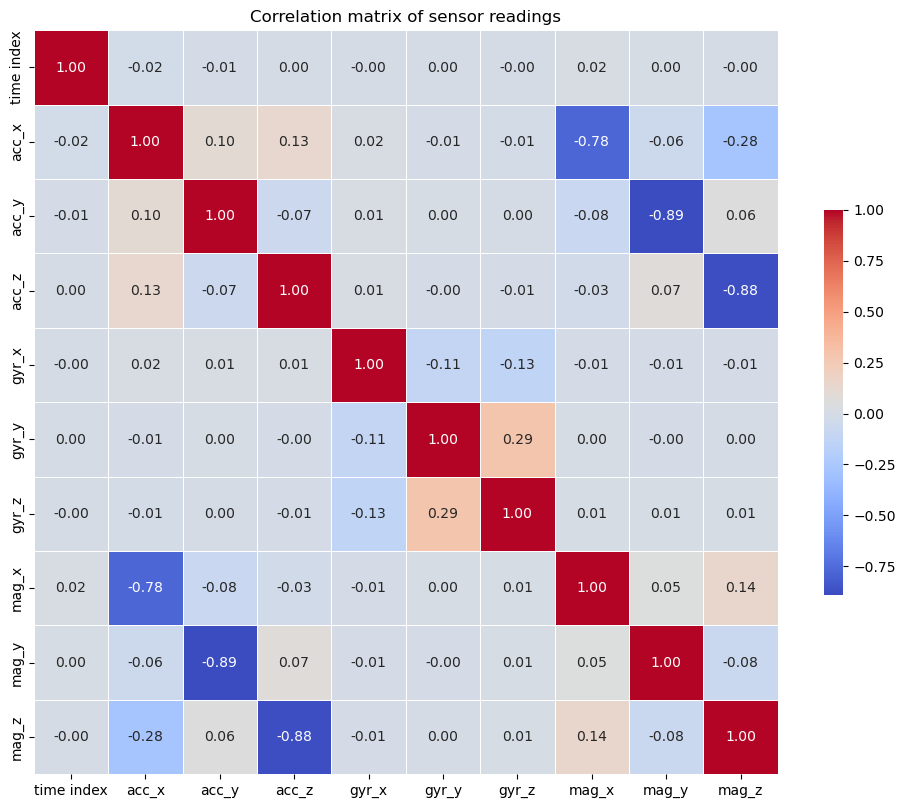

In [ ]:
corr = sensor_df.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation matrix of sensor readings')
plt.show()


 There are high negative correlations between the accelerometer readings along different axes and the magnetometer readings along the same axes. For instance, acc_x with mag_x, acc_y with mag_y, and acc_z with mag_z. This suggests that as accelerometer readings increase in one direction, the corresponding magnetometer readings decrease and vice versa. This could be due to the orientation of the sensors during the exercise movements, where an increase in acceleration in one direction might coincide with a decrease in the magnetic field detection in that direction.

 Most sensor pairs show very low to no correlation (values close to 0). This means that there is no linear relationship between these sensor readings, which is expected as these sensors measure different physical quantities.

 There are moderate positive correlations between the gyroscope and magnetometer readings, particularly between gyr_y and gyr_z with mag_z. This might indicate that rotations measured by the gyroscope around certain axes are associated with changes in the magnetic field detected by the magnetometer around the same axes.


Temporal Patterns

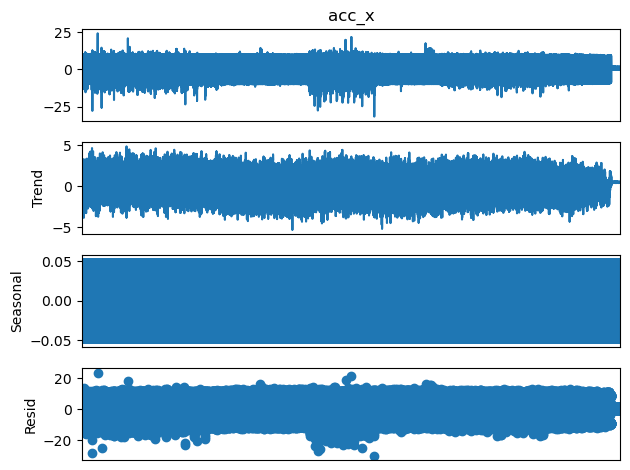

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams['agg.path.chunksize'] = 10000
plt.rcParams['path.simplify_threshold'] = 0.1

sensor_df['time index'] = pd.to_datetime(sensor_df['time index'])
sensor_df.set_index('time index', inplace=True)

decomposition = seasonal_decompose(sensor_df['acc_x'], model='additive', period=25)

fig = decomposition.plot()
plt.show()


**Comparison across Categories**

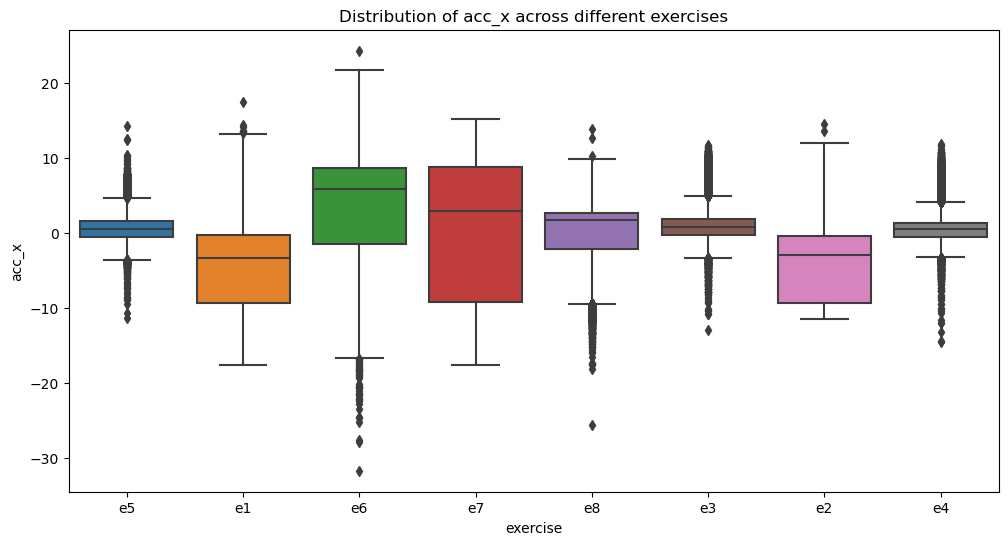

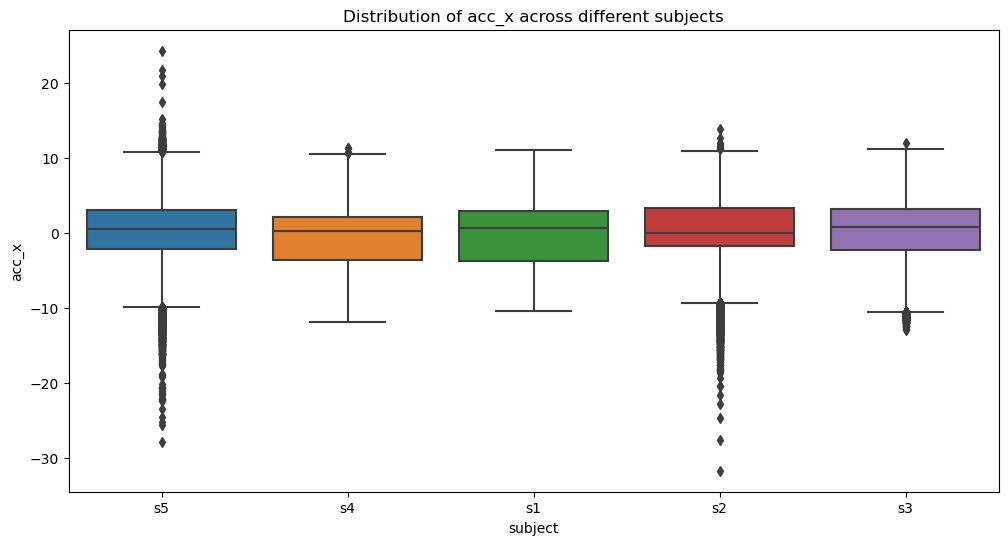

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='exercise', y='acc_x', data=sensor_df)
plt.title('Distribution of acc_x across different exercises')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='subject', y='acc_x', data=sensor_df)
plt.title('Distribution of acc_x across different subjects')
plt.show()


There is significant variability in the accelerometer readings between different exercises. This is expected as different exercises will involve different movements and intensities.

The median values vary between exercises, which could indicate that some exercises are more dynamic or involve more movement in the X direction.

There are outliers present in all exercise categories. The presence of outliers in all exercise types suggests that there are occasional extreme movements that are not typical of the general pattern of movement for that exercise.

The spread of data around the median line varies between exercises. Some exercises, like e6 and e7, show a more symmetrical distribution around the median, while others, like e1, have a distribution skewed towards one end.

Distribution of acc_x Across Different Subjects
Subject Variability: The distributions for different subjects also vary, indicating that there are differences in how each subject performs the exercises or in the sensor readings from each subject.

While there is variability, the range and interquartile ranges for each subject seem relatively consistent, suggesting that the accelerometer data for each subject is reliable and not due to random noise.

Each subject has outliers, but the quantity and spread of these outliers differ, which might be due to individual differences in performing the exercises or different levels of sensor sensitivity.
Key Takeaways

The variability in median values and the spread of the IQR across exercises and subjects can be important features for models that aim to classify types of exercises or identify individual subjects based on sensor data.

The presence of outliers is consistent across exercises and subjects, which may suggest they are an inherent part of the physical activities and not necessarily errors. However, it's important to verify this with domain knowledge.

